# Predicting heart disease using machine learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting weather or not someone has heart disease based on there medical attributes.

we are going to take following approch:
1. problem defination
2. data 
3. evaluation
4. features
5. modelling
6. exparimantation

# problem
in a statement, 
8> given clinical parameters about a patient , can we predict weather he have heart disease or not

# data
> originol data came from the cleaveland data from UCI machine learning repository

# evaluation
> if we can reach 95% accuracy at predicting weather or not a patient has heart disease during a proof of concept , we'll persue the project

# features
to get info abpout each feature of ur data


**Create data dictionary**

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
   1: typical angina
   2: atypical angina
   3: non-anginal pain
   4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital) above 130 - 140 is a typical cause of concern
* chol: serum cholestoral in mg/dl
   1. serum = LDL + HDL + .2* triglycerides
   2. above 200 is cause for concern
*  fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   1. 126 mg/dL signals diabetes
* restecg: resting electrocardiographic results
   0: normal
   1: having ST-T wave abnormality 
     * can range from mild symptoms to severe problems
     * signals non-normal heart beat
    
   2: showing probable or definite left ventricular hypertrophy 
*  thalach: maximum heart rate achieved
*  exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    1: upsloping : better heart rate exercise ST segment
    2: flat : minimal change (typical healthy heart)
    3: downsloping : signs of unhealthy heart 
* ca: number of major vessels (0-3) colored by flourosopy
   1. colored vessels means the dr. can see the blood passing through
   2. the more blood movement the better 
*  thal: thalium stress rate
   1. 3 = normal; 
   2. 6 = fixed defect; 
   3. 7 = reversable defect : no proper blood movement when exercising
*  target - have heart disease or not (1= yea, 0= no )

# Preparing the tools

we are going to use pandas, numpy, matplotlib for data analysis and manipulation

In [1]:
# import all the tools we need

# regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# modles of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#  model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve 


# load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## data exploration (exploratory data analysis or EDA)

the goal here is to find more about the data and become a subject matter export on the

1. what questions r u trying to solve
2. what kind of data do we have and how do we treat different types
3. whats missing data and do u deal with it
4. where are the outliers and why sould u care about them
5. how can uh add , change or remove to get more out of ur data

In [3]:
# lets calc. how many of each classes there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

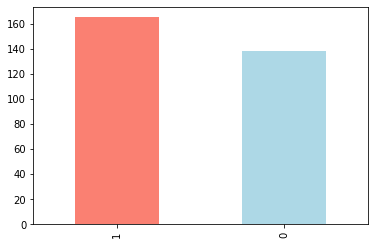

In [4]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heart disease frequency according to sex

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

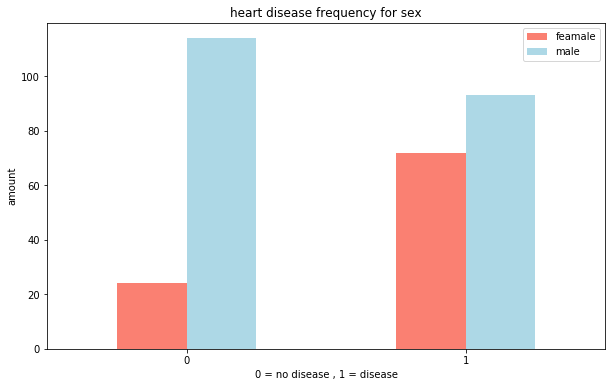

In [9]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar', 
                                    figsize = (10, 6), 
                                    color =['salmon', 'lightblue'])
plt.title('heart disease frequency for sex')
plt.xlabel('0 = no disease , 1 = disease')
plt.ylabel('amount')
plt.legend(['feamale', 'male'])
plt.xticks(rotation =0)

# age vs. max heart rate for heart disease

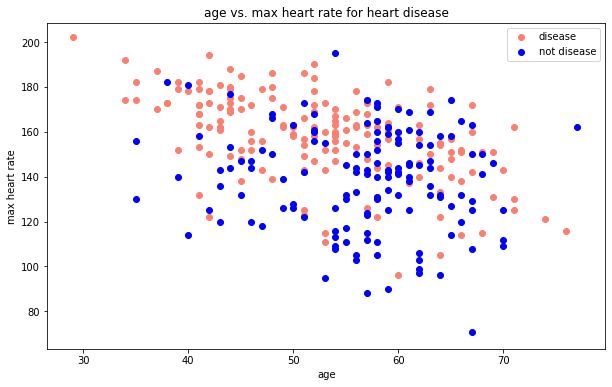

In [10]:
# creating an another figure
plt.figure(figsize =(10, 6))

# scatter with positive cases
plt.scatter(df.age[df.target ==1],
            df.thalach[df.target == 1],
            c = 'salmon')

# scatter for negative cases
plt.scatter(df.age[df.target ==0],
            df.thalach[df.target == 0],
            c = 'blue')


plt.title('age vs. max heart rate for heart disease')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['disease', 'not disease'])

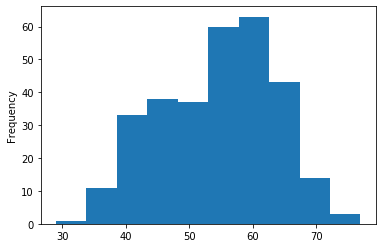

In [11]:
# check distribution of age with histagram
df.age.plot.hist()

# heart disease frequency per chest pain type

cp: chest pain type 
1. typical angina : cp due to decrease blood supply to the heart
2. atypical angina : cp not related to heart
3. non-anginal pain : typically esthophageal spasms
4. asymptomatic : cp not showing signs of disease

In [12]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [13]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


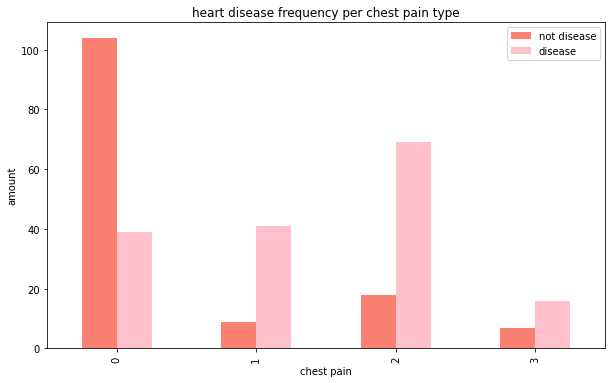

In [14]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize=(10,6),
                                   color = ['salmon', 'pink'])

plt.title("heart disease frequency per chest pain type")
plt.xlabel('chest pain')
plt.ylabel('amount')
plt.legend(['not disease', 'disease'])

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# make a corelation matrix

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


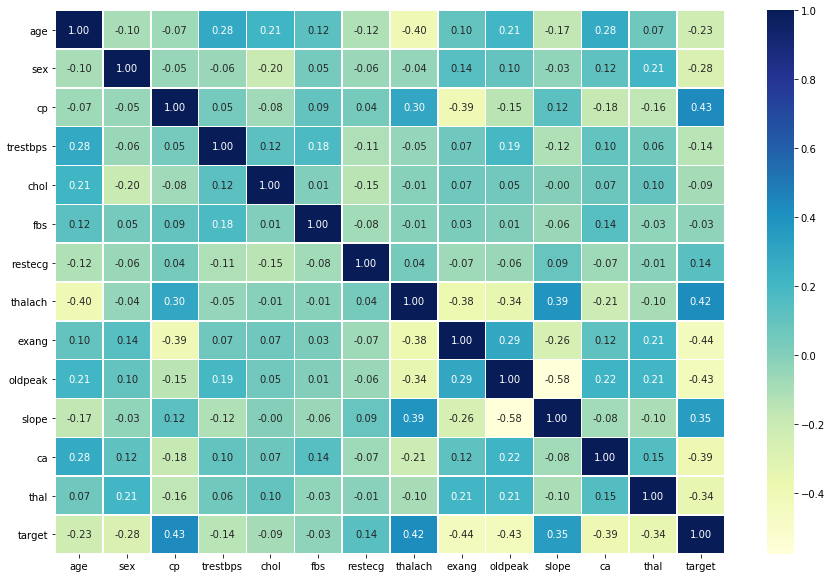

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths= 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

here if value is +ve i.e having positive corellation : value of 1 variable increases then other variable's value also insrease
for ex cp vs target as value of cp increases for target = 1 (consider previous graph)
nd if value is -ve i.e negative corellation : value of 1 variable increases then value of other variable dicreses
for ex exang vs target as value of exand inreases i.e is 1 then target value dicreases i.e is 0 

# 5. modelling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# split data into x and y
x = df.drop('target', axis =1)
y = df.target

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# split data into train and test
np.random.seed(42)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)



now we have got our data split ito train and test data, now it's time to build a machine learning model

we'll train it (find patterns) on train set

we'll test it (using patterns) on test set

We are going to try 3 different machine learning models:
1. logistic regression
2. k-nearest neighbour classifier
3. random forest classifier

In [22]:
# put models in a dictionary
clf = { 'logistic regressor' : LogisticRegression(),
         'k-n neighbour' : KNeighborsClassifier(),
         'random forest' : RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(clf, xtrain, xtest, ytrain, ytest):
    """
    fits and evaluates machine learning models
    """
    # set random seed
    
    np.random.seed(42)
    # make dictionary to store model scores
    model_scores = {}
    # loop through models
    for name, model in clf.items():
        # fit the model to the data
        model.fit(xtrain, ytrain)
        #evaluate the model and append it's score into model_scores
        model_scores[name] = model.score(xtest, ytest)
    return model_scores


In [23]:
model_scores = fit_and_score(clf = clf,
                             xtrain = xtrain,
                             xtest = xtest, 
                             ytrain = ytrain, ytest=ytest)
model_scores

C:\Users\parid\desktop\ml-course\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regressor': 0.8852459016393442,
 'k-n neighbour': 0.6885245901639344,
 'random forest': 0.8360655737704918}

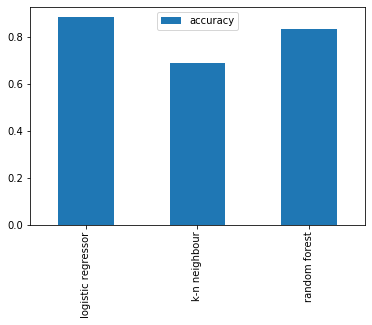

In [24]:
model_compare = pd.DataFrame(model_scores, index =['accuracy'])
model_compare.T.plot.bar();

Now we have got a baseline model.... and we know a model's first predictions aren't always what we should base our next steps off. what should we do?

now let's look at the following
* Hyperperameter tuning
* feature importance
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* area under the curve (AUC)

## hyperperameter tuning (by hands)

In [25]:
# let's tune KNN

train_scores = []
test_scores = []

# create a list of different values of n_neighbours
neighbours = range(1, 21)

# set up KNN instance
KNN = KNeighborsClassifier()

# loop through different n_neighbours
for i in neighbours:
    KNN.set_params(n_neighbors = i)

    # fit the algorithom
    KNN.fit(xtrain, ytrain)
    
    # update the training score list
    train_scores.append(KNN.score(xtrain, ytrain))
    
    # update the test score list
    test_scores.append(KNN.score(xtest, ytest))

In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max knn score on the test data : 75.41%


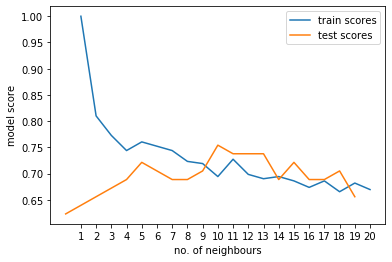

In [28]:
plt.plot(neighbours, train_scores, test_scores)
plt.xlabel('no. of neighbours')
plt.ylabel('model score')
plt.xticks(np.arange(1, 21, 1))
plt.legend(['train scores', 'test scores'])

print(f'max knn score on the test data : {max(test_scores) * 100 :.2f}%')

# hyperperameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression
* randomforest

In [29]:
# create a hyperperameter grid for logistic regression
lr_grid = {'C' : np.logspace(-4, 4, 20),
            'solver': ['liblinear']}

# create a hyperperameter grid for random forest
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)}

now we have got hyperperameters grid setup let's tune our models by using randomizedsearchcv

In [30]:
# Tune LogisticRegression

np.random.seed(42)

#set up random hyperperameter search for LogisticResgression
rs_lr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions= lr_grid,
                           cv = 5, 
                            n_iter= 20,
                            verbose=True)

#fit random hyperperameter search for LogisticRegression
rs_lr.fit(xtrain, ytrain)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [31]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_lr.score(xtest, ytest)

0.8852459016393442

In [33]:
# tune random forest classifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5, 
                           n_iter = 20, 
                           verbose=True)

rs_rf.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [34]:
rs_rf.score(xtest, ytest)

0.8688524590163934

since logistic regression model works best we will try and improve it with gridSearchCV

# Hyper tuning with GridSearchCV

In [35]:
# creating grid for LogisticResgession Model
lr_grid= {'C' : np.logspace(-4, 4, 30),
          'solver' :['liblinear']}

# setup grid hyperperameter search for logistic regressor
lr_gs = GridSearchCV(LogisticRegression(),
                     param_grid= lr_grid,
                     cv = 5, 
                     verbose=True)

lr_gs.fit(xtrain, ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [36]:
lr_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
lr_gs.score(xtest, ytest)

0.8852459016393442

## Evaluating Our tuned machine learning model , beyond accuracy

* roc curve and area under the curve 
* confusion matrix 
* classification report
* precision
* recall
* f1 score

... and it would be great if cross - validation is used where possible

to make comparisions and evaluate our trained model, first we need to make predictions

In [38]:
# let's make predictions with tuned model
y_preds = lr_gs.predict(xtest)

In [39]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
ytest

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

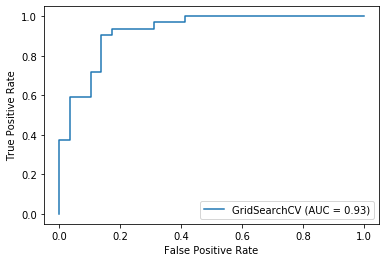

In [41]:
# plot rOC curve and calculate AUC metrics
plot_roc_curve(lr_gs, xtest, ytest)

In [42]:
# confusion metrics
print(confusion_matrix(y_preds, ytest))

[[25  3]
 [ 4 29]]


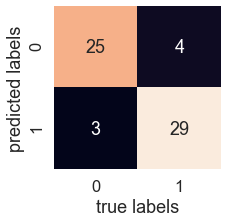

In [43]:
sns.set(font_scale = 1.5)

def plot_conf_metrics(ytest, y_preds):
    """
    this function plots confusion matrics using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(ytest, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel('true labels')
    plt.ylabel('predicted labels')
    
plot_conf_metrics(ytest, y_preds)
    
    

 let's get a classification report as well as cross-validated precission, recall and f1 score

In [44]:
print(classification_report(ytest, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



we're going to calc accuracy,  precision, recall, f1 using cross-validation and to do this we are going to use cross_val_score

In [45]:
# check best parameters
lr_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# create new classifier with best params
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

In [47]:
# cross validated accuracy
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring ='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [48]:
# cross validated precision
cv_pre = cross_val_score(clf, x, y, scoring = 'precision')
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [49]:
# cross validated recall
cv_rec = cross_val_score(clf, x, y, scoring = 'recall')
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [50]:
# cross validated f1 score
cv_f1 = cross_val_score(clf, x, y, scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

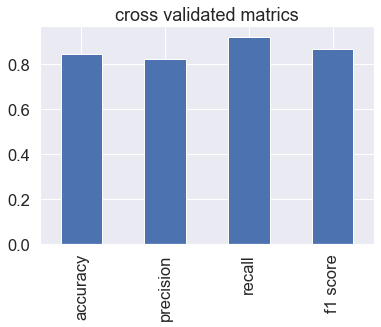

In [51]:
# visualise cross validated matrics
cv_matrics = pd.DataFrame({'accuracy' : cv_acc,
              'precision': cv_pre,
              'recall': cv_rec,
               'f1 score': cv_f1},
                         index = [0])

cv_matrics.T.plot.bar(title ='cross validated matrics',
                      legend = False);

## Feature importance
feature importance is another as asking , which features 'contibuted most to the outcome of the model and how did they congtibute?'

finding feature importance is different for each machine learning model

In [52]:
# fitting
clf.fit(xtrain, ytrain)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044662,  0.66067038, -0.01156993, -0.00166375,
         0.04386106,  0.31275854,  0.02459361, -0.60413087, -0.56862799,
         0.45051631, -0.63609901, -0.67663377]])

In [54]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167281800921813,
 'sex': -0.8604466239809117,
 'cp': 0.6606703766798884,
 'trestbps': -0.011569931597383336,
 'chol': -0.0016637450521231358,
 'fbs': 0.04386105992620248,
 'restecg': 0.3127585357011236,
 'thalach': 0.024593614974750246,
 'exang': -0.6041308708144731,
 'oldpeak': -0.5686279869906085,
 'slope': 0.45051630615488936,
 'ca': -0.6360990134888542,
 'thal': -0.6766337673609633}

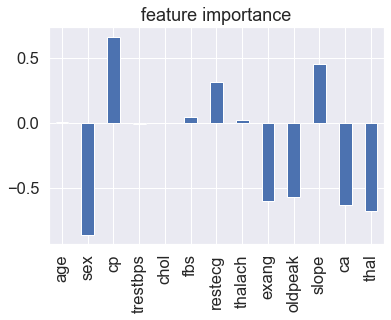

In [55]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title = 'feature importance', legend = False)


In [57]:
pd.crosstab(df.sex, df.target) 

target,0,1
sex,,
0,24,72
1,114,93


 it have a negative coprelation therefore as sex value increases the target vaue decreases

In [59]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


it have a positive corelation as slope value increases target value also increases

# 6. Experimation

If you haven't hit ur evaluation metrics yet... ask yourself..

* could u collect more data?
* couls u try a better model? 
* could u improve the current model(beyond what we've done so far)
* if ur model is gud enough        (you have hit ur evaluation metrics) how would you export and shear with other?



**Save model using Pickel**

In [62]:
import pickle
# save model to disk
filename = 'heart-disease-final-model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.8852459016393442
